In [31]:
# data processing libraries
import pandas as pd
import numpy as np
import random

# clustering algorithms
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

# soccer data gathering library
from statsbombpy import sb

# various plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch, FontManager
from scipy.ndimage import gaussian_filter

# filter non-useful warnings
from warnings import filterwarnings
from statsbombpy.api_client import NoAuthWarning
filterwarnings('ignore', category=NoAuthWarning)
filterwarnings('ignore', category=FutureWarning)


In [9]:
# list_to_string = lambda x: ','.join([str(i) for i in x])

# def preprocessing_events_df(
#     events_df,
#     o_cols=[
#         'player', 'location', 'type',
#         'pass_outcome', 'pass_end_location', 'pass_cross', 'pass_goal_assist', 'pass_shot_assist', 'pass_through_ball', 'pass_technique',
#         'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type',
#         'dribble_outcome'],
#     o_attrs=['Pass', 'Shot', 'Dribble', 'Cross'],
#     time_cols=['match_id', 'minute', 'second']
#     ):
#     '''
#     Return dataframe that contains offense-related metrics
#     found in `offensive_cols` and `offensive_attrs`

#     > events_df: play-by-play dataframe of team formations,
#                  match start/finish, and on-ball actions
#     '''
    
#     # if NAs are auto generated for me
#     for col in o_cols:
#         if col not in events_df.columns:
#             o_cols.remove(col)

#     # events from specific match with valid on-ball player data
#     nonempty_df = events_df[(events_df['player_id'].notna()) & (events_df['location'].notna()) & (events_df['team'] == 'Barcelona')][o_cols + time_cols]

#     # select specific offensive actions (types)
#     nonempty_df = nonempty_df[nonempty_df['type'].isin(o_attrs)]

#     # split x,y coordinates of location data
#     nonempty_df = pd.merge(
#         nonempty_df,
#         nonempty_df['location'].apply(list_to_string).str.split(',', expand=True),
#         left_index=True, right_index=True, how='outer'
#         )
#     nonempty_df.rename(columns={0:'location_x', 1:'location_y'}, inplace=True)

#     # split x,y coordinates of passing event data
#     nonempty_df = pd.merge(
#         nonempty_df,
#         nonempty_df[nonempty_df['type'] == 'Pass']['pass_end_location'].apply(list_to_string).str.split(',', expand=True),
#         left_index=True, right_index=True, how='outer'
#         )
#     nonempty_df.rename(columns={0:'pass_end_x', 1:'pass_end_y'}, inplace=True)

#     # update type column to include crosses
#     nonempty_df['type'] = np.where(nonempty_df['pass_cross'] == 1, 'Cross', nonempty_df['type'])

#     # return dataframe with desired events
#     return nonempty_df.drop(columns=['location', 'pass_end_location'])

In [16]:
# all_comps = sb.competitions()
# la_liga_comps = all_comps[all_comps['competition_name'] == 'La Liga']

# df_list = []

# with alive_bar(total=la_liga_comps.shape[0], dual_line=True, title='Barcelona data') as bar:
#     for idx, info_series in la_liga_comps[['competition_id', 'season_id']].iterrows():
#         bar.text = f"-> Gathering {la_liga_comps['season_name']} data"
#         season_df = sb.matches(competition_id=info_series['competition_id'], season_id=info_series['season_id'])
#         barca_df = pd.concat([
#             preprocessing_events_df(sb.events(match_id=idx))
#             for idx in season_df['match_id']
#         ]).reset_index(drop=True)
#         df_list.append(barca_df)
#         bar()

# barca_df = pd.concat(df_list).reset_index(drop=True)
# barca_df

Barcelona data |████████████████████████████████████████| 17/17 [100%] in 21:37.9 (0.01/s) 


,player,type,pass_outcome,pass_cross,pass_shot_assist,pass_technique,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,dribble_outcome,match_id,minute,second,location_x,location_y,pass_end_x,pass_end_y
0,Lionel Andrés Messi Cuccittini,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,1,61.0,40.1,59.2,38.0
1,Ousmane Dembélé,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,1,58.3,38.6,48.6,47.8
2,Sergio Busquets i Burgos,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,3,48.0,49.8,54.6,74.3
3,Sergino Dest,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,6,55.5,74.3,41.9,66.8
4,Óscar Mingueza García,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,8,41.9,65.7,35.9,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384409,Anderson Luís de Souza,Shot,NaN,NaN,NaN,NaN,Saved,0.236569,Normal,Open Play,NaN,68353,57,30,114.9,29.5,NaN,NaN
384410,Henrik Larsson,Shot,NaN,NaN,NaN,NaN,Off T,0.047042,Normal,Open Play,NaN,68353,57,37,116.8,49.2,NaN,NaN
384411,Ronaldo de Assis Moreira,Shot,NaN,NaN,NaN,NaN,Off T,0.015000,Normal,Open Play,NaN,68353,65,39,87.8,25.2,NaN,NaN
384412,Ronaldo de Assis Moreira,Shot,NaN,NaN,NaN,NaN,Off T,0.192773,Normal,Open Play,NaN,68353,66,49,108.4,28.4,NaN,NaN


In [21]:
# barca_df.to_csv('barcelona_event_data.csv', index=False)

In [23]:
barca_df = pd.read_csv('barcelona_event_data.csv')

In [25]:
barca_df

,player,type,pass_outcome,pass_cross,pass_shot_assist,pass_technique,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,dribble_outcome,match_id,minute,second,location_x,location_y,pass_end_x,pass_end_y
0,Lionel Andrés Messi Cuccittini,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,1,61.0,40.1,59.2,38.0
1,Ousmane Dembélé,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,1,58.3,38.6,48.6,47.8
2,Sergio Busquets i Burgos,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,3,48.0,49.8,54.6,74.3
3,Sergino Dest,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,6,55.5,74.3,41.9,66.8
4,Óscar Mingueza García,Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3773369,0,8,41.9,65.7,35.9,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384409,Anderson Luís de Souza,Shot,NaN,NaN,NaN,NaN,Saved,0.236569,Normal,Open Play,NaN,68353,57,30,114.9,29.5,NaN,NaN
384410,Henrik Larsson,Shot,NaN,NaN,NaN,NaN,Off T,0.047042,Normal,Open Play,NaN,68353,57,37,116.8,49.2,NaN,NaN
384411,Ronaldo de Assis Moreira,Shot,NaN,NaN,NaN,NaN,Off T,0.015000,Normal,Open Play,NaN,68353,65,39,87.8,25.2,NaN,NaN
384412,Ronaldo de Assis Moreira,Shot,NaN,NaN,NaN,NaN,Off T,0.192773,Normal,Open Play,NaN,68353,66,49,108.4,28.4,NaN,NaN


---

#### Recreating Results

In [26]:
grouped_df = barca_df.drop(columns='match_id').groupby(['player', 'type'])

In [27]:
player_dict = {player : dict() for player in barca_df['player'].unique()}

for player_type, type_df in grouped_df:
    player_dict[player_type[0]][player_type[1]] = type_df

In [28]:
for player in player_dict:
    for action in ['Pass', 'Shot', 'Dribble', 'Cross']:
        if action not in player_dict[player].keys():
            player_dict[player][action] = pd.DataFrame([player, action, np.nan, np.nan, np.nan, 0, 0, 0, 0, 0, 0, 0]).T
            player_dict[player][action].columns=['player', 'type', 'shot_outcome', 'dribble_outcome', 
                'pass_cross', 'shot_statsbomb_xg', 'minute', 'second',
                'location_x', 'location_y', 'pass_end_x', 'pass_end_y']

---

#### Clustering Type DataFrames

In [29]:
barca_df['type'].value_counts()

Pass       355536
Dribble     14798
Shot         8197
Cross        5883
Name: type, dtype: int64

In [32]:
master_tsne_shot = barca_df[barca_df['type'] == 'Shot'][['shot_outcome', 'shot_statsbomb_xg', 'location_x', 'location_y']]
master_tsne_shot[['location_x', 'location_y']] = master_tsne_shot[['location_x', 'location_y']].astype('float64')
master_tsne_shot['outcome'] = np.where(master_tsne_shot['shot_outcome'] == 'Goal', 'Goal', 'No goal')
master_tsne_shot_sample = master_tsne_shot.iloc[random.sample(range(master_tsne_shot.shape[0]), k=1000), :]

master_tsne_pass = barca_df[barca_df['type'] == 'Pass'][['pass_outcome', 'location_x', 'location_y', 'pass_end_x', 'pass_end_y']]
master_tsne_pass[['location_x', 'location_y']] = master_tsne_pass[['location_x', 'location_y']].astype('float64')
master_tsne_pass[['pass_end_x', 'pass_end_y']] = master_tsne_pass[['pass_end_x', 'pass_end_y']].astype('float64')
master_tsne_pass['outcome'] = barca_df[barca_df['type'] == 'Pass']['pass_outcome'].fillna('Complete')
master_tsne_pass_sample = master_tsne_pass.iloc[random.sample(range(master_tsne_pass.shape[0]), k=1000), :]
# master_tsne_pass = barca_df[barca_df['type'] == 'Pass'][['pass_outcome', 'pass_cross', 'pass_goal_assist', 'pass_shot_assist', 'pass_through_ball', 'pass_technique', 'location_x', 'location_y', 'pass_end_x', 'pass_end_y']]

master_tsne_dribble = barca_df[barca_df['type'] == 'Dribble'][['dribble_outcome', 'location_x', 'location_y']]
master_tsne_dribble[['location_x', 'location_y']] = master_tsne_dribble[['location_x', 'location_y']].astype('float64')
master_tsne_dribble_sample = master_tsne_dribble.iloc[random.sample(range(master_tsne_dribble.shape[0]), k=1000), :]

master_tsne_cross = barca_df[barca_df['type'] == 'Cross'][['location_x', 'location_y', 'pass_end_x', 'pass_end_y']]
master_tsne_cross[['location_x', 'location_y']] = master_tsne_cross[['location_x', 'location_y']].astype('float64')
master_tsne_cross[['pass_end_x', 'pass_end_y']] = master_tsne_cross[['pass_end_x', 'pass_end_y']].astype('float64')
master_tsne_cross['outcome'] = np.where(barca_df[barca_df['type'] == 'Cross']['pass_outcome'].isna(), 'Complete', 'Incomplete')
master_tsne_cross_sample = master_tsne_cross.iloc[random.sample(range(master_tsne_cross.shape[0]), k=1000), :]

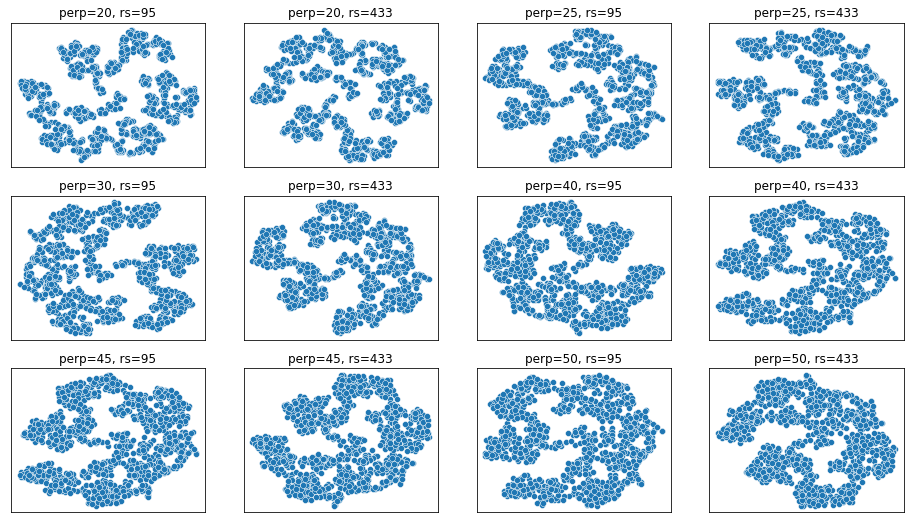

In [36]:
f, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,9))
for i, perp in enumerate([20,25,30,40,45,50]):
    for j, rs in enumerate([95,433]):
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        tsne_fit = tsne.fit_transform(master_tsne_shot_sample.drop(columns=['shot_outcome', 'outcome']))
        tsne_data = pd.DataFrame(tsne_fit, columns=['x_proj', 'y_proj'])
        
        sns.scatterplot(x='x_proj', y='y_proj', data=tsne_data, ax=axs[i//2, 2*(i%2) + j%2], legend=False)
        
        axs[i//2, 2*(i%2) + j%2].set_title(f'perp={perp}, rs={rs}')
        axs[i//2, 2*(i%2) + j%2].set_xticks([])
        axs[i//2, 2*(i%2) + j%2].set_yticks([])
        axs[i//2, 2*(i%2) + j%2].set_xlabel('')
        axs[i//2, 2*(i%2) + j%2].set_ylabel('')

plt.show()

---

#### Minute Data

In [64]:
time_df = pd.read_csv('barca_time_df.csv')

In [58]:
time_per_match = time_df.groupby(['player', 'match_id']).agg({'minute': ['min', 'max']})
total_minutes_df = pd.DataFrame(time_per_match['minute']['max'] - time_per_match['minute']['min']).reset_index().groupby(['player', 'match_id']).sum().rename(columns={0:'minutes'})
total_minutes_dict = total_minutes_df.to_dict()

---

#### Setting Up Heatmaps

In [41]:
def player_action_heatmap(player, action, nrows=24, ncols=25):
    if player not in player_dict:
        print(f'Invalid player entry: {player} not found')
        return None
    if action not in player_dict[player]:
        print(f'Invalid action type for {player}: {action} not found')
        return None
    
    player_total_mins = np.sum([total_minutes_dict['minutes'][tup] for tup in total_minutes_dict['minutes'] if tup[0] == player])

    heatmap_dict = {'Pass':[], 'Shot':[], 'Dribble':[], 'Cross':[]}
    # create empty dataframe of specified dimensions
    heatmap_matrix = np.zeros(shape=(nrows, ncols))

    # partition the field evenly (could be altered depending on weights
    # of different grid patterns on the field)
    row_divs = np.round(np.linspace(0, 80, nrows), 2)
    col_divs = np.round(np.linspace(0, 120, ncols), 2)

    # iterate over rows and assign count to specific cell grid
    for _, action in player_dict[player][action][['location_x', 'location_y']].iterrows():
        # assign to closest row grid cell and column grid cell
        grid_row = np.abs(row_divs - np.float64(action['location_y'])).argmin()
        grid_col = np.abs(col_divs - np.float64(action['location_x'])).argmin()
        # argmin index out of bounds if closest to upper bound (nrows, ncols)
        if grid_row == nrows: grid_row -= 1
        if grid_col == ncols: grid_col -= 1
        # update corresponding grid cell (of player-action combo) by one adj. 90-min frequency
        heatmap_matrix[grid_row, grid_col] += 90 / player_total_mins
    
    return gaussian_filter(heatmap_matrix, sigma=1.5)

In [42]:
def compressed_heatmap_matrix(player_action_dict, nrows=24, ncols=25):
    nmf_dict = {action:pd.DataFrame([0]*600, index=range(600), columns=['dummy']) for action in ['Pass', 'Dribble', 'Shot', 'Cross']}
    
    for player in player_action_dict:
        for action in player_action_dict[player]:
            nmf_dict[action][player] = player_action_heatmap(player, action, nrows, ncols).reshape(1, 600)[0]
    
    return {action: nmf_dict[action].drop(columns='dummy') for action in ['Pass', 'Dribble', 'Shot', 'Cross']}

In [43]:
(_, nmf_pass_matrix), (_, nmf_dribble_matrix), (_, nmf_shot_matrix), (_, nmf_cross_matrix) = compressed_heatmap_matrix(player_action_dict=player_dict).items()

/var/folders/nf/hnvk59fn3wd92wxfjhbxf2z00000gn/T/ipykernel_6392/3591535136.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nmf_dict[action][player] = player_action_heatmap(player, action, nrows, ncols).reshape(1, 600)[0]


---

### NMF Components

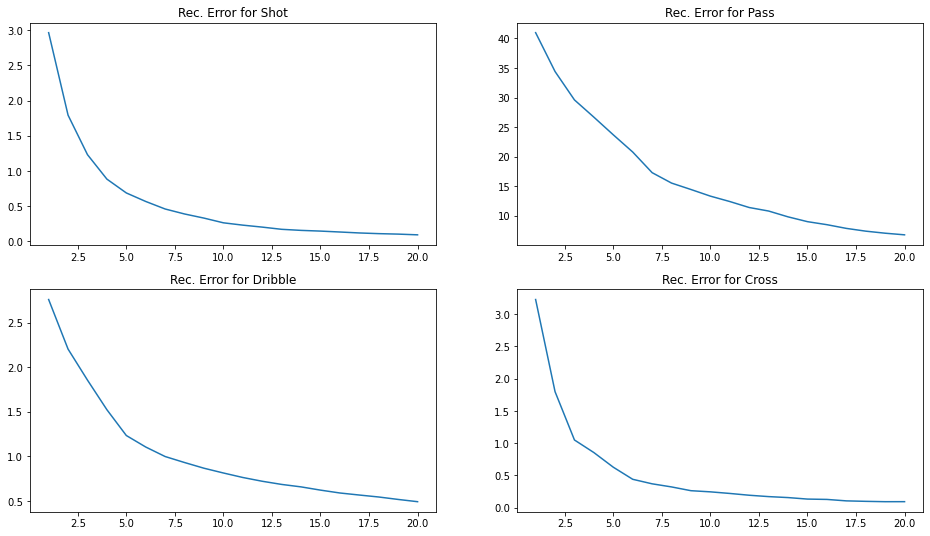

In [44]:
nmf_shot_rec_err = [
    NMF(n_components=n_comps, random_state=100).fit(nmf_shot_matrix).reconstruction_err_
    for n_comps in range(1,21)
]


nmf_pass_rec_err = [
    NMF(n_components=n_comps, random_state=100).fit(nmf_pass_matrix).reconstruction_err_
    for n_comps in range(1,21)
]


nmf_dribble_rec_err = [
    NMF(n_components=n_comps, random_state=100).fit(nmf_dribble_matrix).reconstruction_err_
    for n_comps in range(1,21)
]


nmf_cross_rec_err = [
    NMF(n_components=n_comps, random_state=100).fit(nmf_cross_matrix).reconstruction_err_
    for n_comps in range(1,21)
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,9))

axs[0,0].plot(range(1,21), nmf_shot_rec_err)
axs[0,0].set_title('Rec. Error for Shot')
axs[0,1].plot(range(1,21), nmf_pass_rec_err)
axs[0,1].set_title('Rec. Error for Pass')
axs[1,0].plot(range(1,21), nmf_dribble_rec_err)
axs[1,0].set_title('Rec. Error for Dribble')
axs[1,1].plot(range(1,21), nmf_cross_rec_err)
axs[1,1].set_title('Rec. Error for Cross')

plt.show()

In [51]:
n_shot_components = 6
n_pass_components = 6
n_dribble_components = 5
n_cross_components = 3

In [52]:
nmf_shot = NMF(n_components=n_shot_components, random_state=100)
nmf_shot_W = pd.DataFrame(nmf_shot.fit_transform(nmf_shot_matrix))
nmf_shot_H = pd.DataFrame(nmf_shot.components_, columns=nmf_shot_matrix.columns)
nmf_shot_clsmem = nmf_shot_W.apply(lambda x: x / sum(x), axis=1)

In [48]:
nmf_pass = NMF(n_components=n_pass_components, random_state=100)
nmf_pass_W = pd.DataFrame(nmf_pass.fit_transform(nmf_pass_matrix))
nmf_pass_H = pd.DataFrame(nmf_pass.components_, columns=nmf_pass_matrix.columns)
nmf_pass_clsmem = nmf_pass_W.apply(lambda x: x / sum(x), axis=1)

In [49]:
nmf_dribble = NMF(n_components=n_dribble_components, random_state=100)
nmf_dribble_W = pd.DataFrame(nmf_dribble.fit_transform(nmf_dribble_matrix))
nmf_dribble_H = pd.DataFrame(nmf_dribble.components_, columns=nmf_dribble_matrix.columns)
nmf_dribble_clsmem = nmf_dribble_W.apply(lambda x: x / sum(x), axis=1)

In [47]:
nmf_cross = NMF(n_components=n_cross_components, random_state=100)
nmf_cross_W = pd.DataFrame(nmf_cross.fit_transform(nmf_cross_matrix))
nmf_cross_H = pd.DataFrame(nmf_cross.components_, columns=nmf_cross_matrix.columns)
nmf_cross_clsmem = nmf_cross_W.apply(lambda x: x / sum(x), axis=1)

NMF Components for Shot


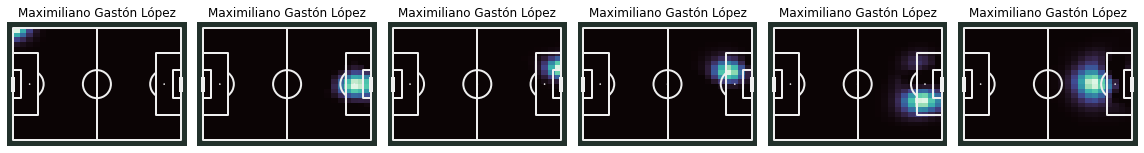

NMF Components for Dribble


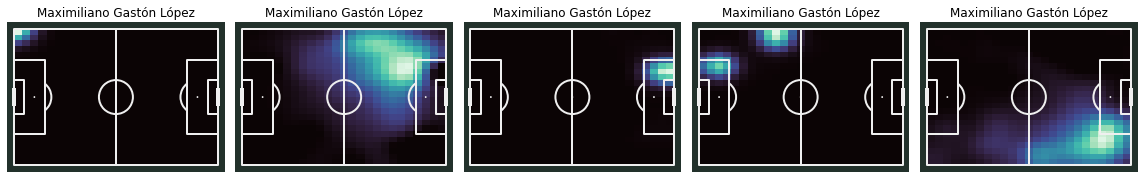

NMF Components for Pass


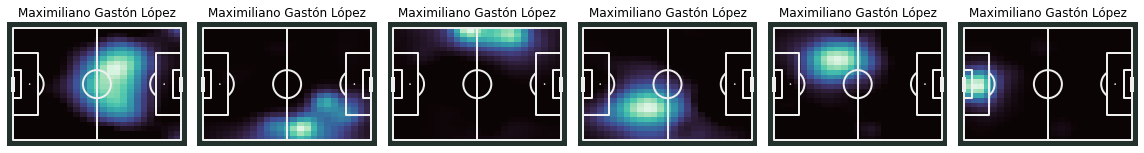

NMF Components for Cross


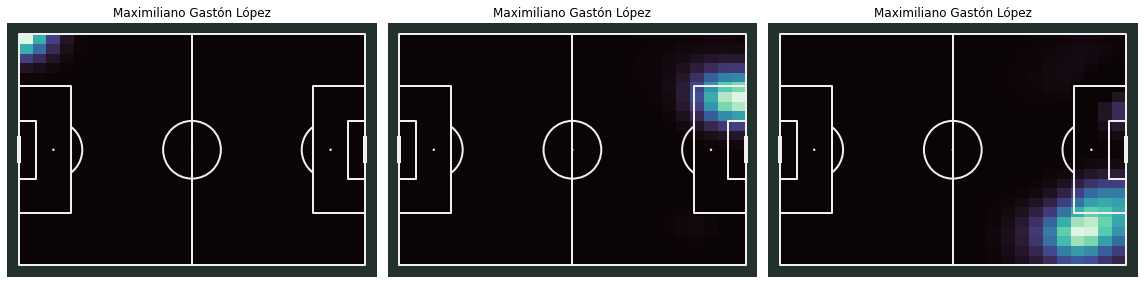

In [54]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')

for action, nmf_W in zip(
    ['Shot', 'Dribble', 'Pass', 'Cross'],
    [nmf_shot_W, nmf_dribble_W, nmf_pass_W, nmf_cross_W]
    ):

    print(f'NMF Components for {action}')
    fig, ax = pitch.draw(ncols=nmf_W.shape[1], figsize=(16,9))
    
    for i in range(nmf_W.shape[1]):
        
        statistic = np.array(nmf_W.iloc[:, i]).reshape((24, 25))

        # construct stats object from binned data, bin mesh, and bin centers
        y, x = statistic.shape
        x_grid = np.linspace(0, 120, x + 1)
        y_grid = np.linspace(0, 80, y + 1)
        cx = x_grid[:-1] + 0.5 * (x_grid[1] - x_grid[0])
        cy = y_grid[:-1] + 0.5 * (y_grid[1] - y_grid[0])
        stats = dict(statistic=statistic, x_grid=x_grid, y_grid=y_grid, cx=cx, cy=cy)

        pcm = pitch.heatmap(stats, ax=ax[i], cmap='mako')
        ax[i].set_title(player.title())
    
    plt.show()